In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Serial No.'], inplace= True)

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [9]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 1)

In [11]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [15]:
x_test_scaled

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(7, activation= 'relu', input_dim = 7))
model.add(Dense(7, activation= 'relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'mean_squared_error', optimizer= 'Adam')

In [20]:
history = model.fit(x_train_scaled, y_train, epochs= 100, validation_split= 0.2)

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 0.5129 - val_loss: 0.5314
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4703 - val_loss: 0.4845
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4288 - val_loss: 0.4379
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3859 - val_loss: 0.3910
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3420 - val_loss: 0.3432
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2972 - val_loss: 0.2938
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2509 - val_loss: 0.2443
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2046 - val_loss: 0.1930
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1563 - val_loss: 0.1404
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1097 - val_loss: 0.0932
Epoch 11/100
8/8 [==========

In [21]:
model.predict(x_test_scaled)

3/3 [==============================] - 0s 2ms/step


array([[0.70501965],
       [0.54757446],
       [0.79198605],
       [0.751886  ],
       [0.84041834],
       [0.6305992 ],
       [0.64068246],
       [0.5085647 ],
       [0.5059448 ],
       [0.95416635],
       [0.7978107 ],
       [0.95328736],
       [0.86736304],
       [0.6228999 ],
       [0.7561695 ],
       [0.7082535 ],
       [0.79350173],
       [0.8509747 ],
       [0.48627633],
       [0.72398955],
       [0.5698882 ],
       [0.8020152 ],
       [0.83410436],
       [0.93925977],
       [0.70636415],
       [0.55768216],
       [0.7268989 ],
       [0.7462923 ],
       [0.89201057],
       [0.65242934],
       [1.0100383 ],
       [0.616475  ],
       [0.7763204 ],
       [0.77415806],
       [0.7198289 ],
       [0.5831641 ],
       [0.5188408 ],
       [0.7059766 ],
       [0.9383056 ],
       [0.77544016],
       [0.9051919 ],
       [0.6574517 ],
       [0.9028259 ],
       [0.6354937 ],
       [0.97211826],
       [0.69530755],
       [0.7458204 ],
       [0.820

In [22]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7698736398218013

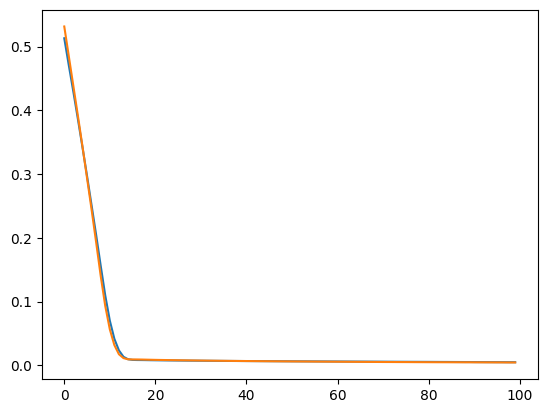

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])